Link for the 1st dataset https://drive.google.com/drive/folders/1SGpNjkVEe2GydCo0myDT9x6icSKv6-fz?usp=drive_link

Link for Sines dataset
https://drive.google.com/file/d/1mUwisUFIAwJ3MCscyN627RfbkmuqPca5/view?usp=sharing

Link for Seecs EEG Lab Dataset
https://drive.google.com/drive/folders/1Nioa7Vd6wIuTAhZn1e1lBisiu1wTTmS_?usp=drive_link

In [ ]:
import glob
import numpy as np
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')

EEG_data_directory_path = '/content/drive/MyDrive/ML/project/EEG_Data/25-users/*.txt'
Labels_directory_path = '/content/drive/MyDrive/ML/project/EEG_Data/labels/*.lab'

In [ ]:
# For the EEG Data

data_file_paths = glob.glob(EEG_data_directory_path)

flattened_data = np.empty((0, 7168), dtype=float)

for data_file_path in data_file_paths:
    data = np.loadtxt(data_file_path)
    flattened_row = data.flatten().reshape(1, -1)
    flattened_data = np.concatenate((flattened_data, flattened_row), axis=0)

print("Shape of Flattened EEG Data:", flattened_data.shape)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# For Labels
label_file_paths = glob.glob(Labels_directory_path)

labels = []

label_mapping = {"disike": 0, "like": 1}

for label_file_path in label_file_paths:
    with open(label_file_path, 'r') as label_file:
        label_word = label_file.read().strip().lower()
        label_value = label_mapping.get(label_word, None)
        if label_value is not None:
            labels.append(label_value)

labels = np.array(labels).reshape(-1, 1)

print("Shape of Labels:", labels.shape)



Shape of Labels: (1045, 1)


Shape of Combined Data: (1045, 7169)
Shape of Preprocessed Data: (1045, 201)


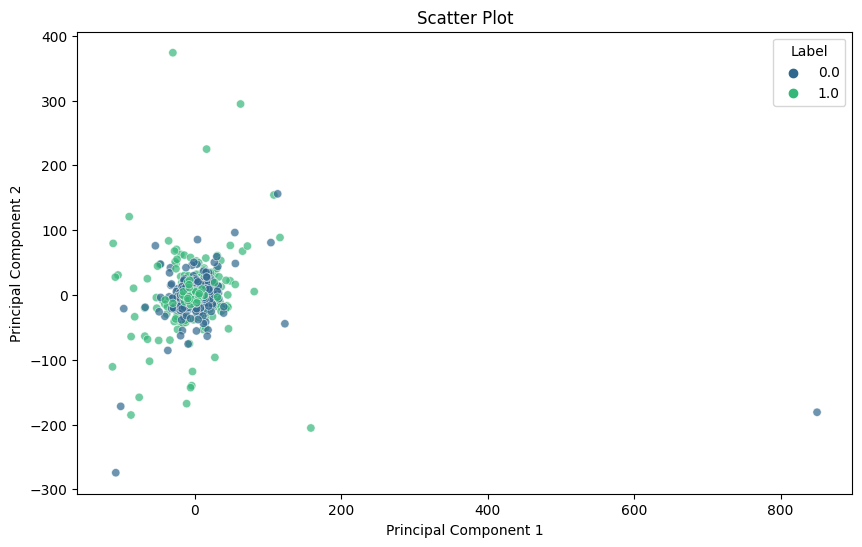

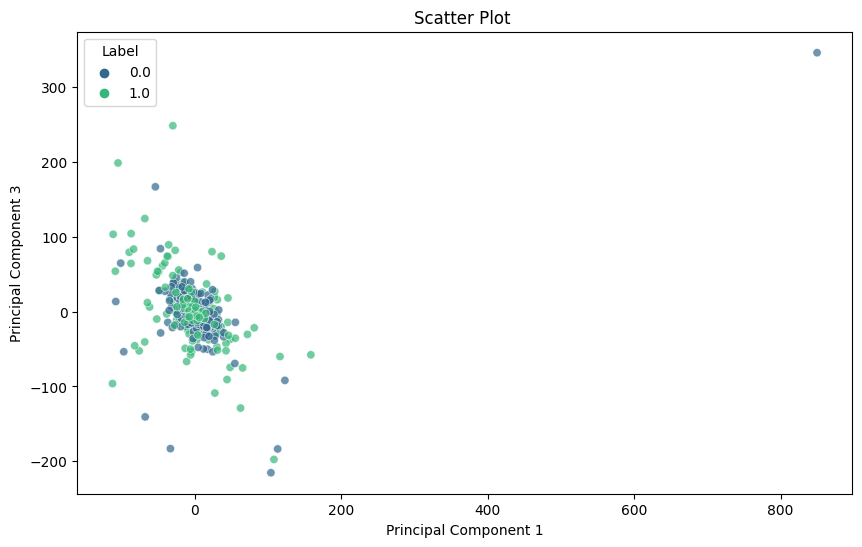

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combining the Flattened EEG Data with respective Labels
combined_data = np.hstack((flattened_data, labels))

print("Shape of Combined Data:", combined_data.shape)
# Extract EEG data and labels
eeg_data = combined_data[:, :-1]
labels = combined_data[:, -1]

num_signals_to_plot = 40

# # Plot the selected signals
# for i in range(num_signals_to_plot):
#     # Extract the i-th signal
#     signal = eeg_data[i, :]

#     # Create a time axis (assuming 7168 data points per signal)
#     time_axis = np.arange(0, 7168)

#     # Plot the signal
#     plt.figure(figsize=(7, 4))
#     plt.plot(time_axis, signal)
#     plt.title(f'EEG Signal {i+1} - Label: {labels[i]}')
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.show()

# Extracting features and labels from the combined data
eeg_features, labels = combined_data[:, :-1], combined_data[:, -1]

# Standardizig the features (mean=0, variance=1)
scaler = StandardScaler()
eeg_features_standardized = scaler.fit_transform(eeg_features)
plt.show()

# Apply Principal Component Analysis (PCA) for dimensionality reduction
# Adjust n_components based on your requirements
n_components = 200
pca = PCA(n_components=n_components)
eeg_features_pca = pca.fit_transform(eeg_features_standardized)

# Combine the preprocessed features with labels
preprocessed_data = np.hstack((eeg_features_pca, labels.reshape(-1, 1)))

print("Shape of Preprocessed Data:", preprocessed_data.shape)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=eeg_features_pca[:, 0], y=eeg_features_pca[:, 1], hue=labels, palette='viridis', alpha=0.7)
plt.title('Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', loc='best')
plt.show()

# Scatter plot for the first and third principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=eeg_features_pca[:, 0], y=eeg_features_pca[:, 2], hue=labels, palette='viridis', alpha=0.7)
plt.title('Scatter Plot ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(title='Label', loc='best')
plt.show()

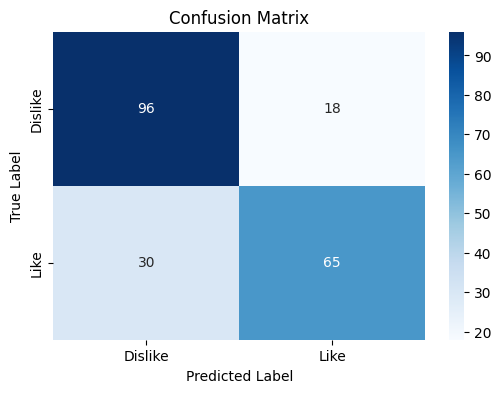

Accuracy of the logistic regression model: 0.7703349282296651
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       114
         1.0       0.78      0.68      0.73        95

    accuracy                           0.77       209
   macro avg       0.77      0.76      0.77       209
weighted avg       0.77      0.77      0.77       209



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(preprocessed_data[:, :-1], preprocessed_data[:, -1], test_size=0.2, random_state=42)

# Initializing the logistic regression model
logreg_model = LogisticRegression()

# Training the model on the training data
logreg_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logreg_model.predict(X_test)

 # Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dislike', 'Like'], yticklabels=['Dislike', 'Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Calculating and printing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


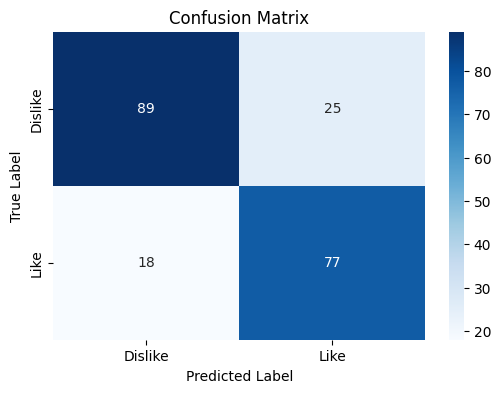

Accuracy of the SVM model: 0.7942583732057417
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81       114
         1.0       0.75      0.81      0.78        95

    accuracy                           0.79       209
   macro avg       0.79      0.80      0.79       209
weighted avg       0.80      0.79      0.79       209



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(preprocessed_data[:, :-1], preprocessed_data[:, -1], test_size=0.2, random_state=42)

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dislike', 'Like'], yticklabels=['Dislike', 'Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM model:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Epoch 1/10
21/21 [==============================] - 1s 8ms/step - loss: 0.6677 - accuracy: 0.6243 - val_loss: 0.6278 - val_accuracy: 0.6964
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7695 - val_loss: 0.5685 - val_accuracy: 0.7143
Epoch 3/10
21/21 [==============================] - 0s 3ms/step - loss: 0.4659 - accuracy: 0.7844 - val_loss: 0.5169 - val_accuracy: 0.7440
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8219 - val_loss: 0.4865 - val_accuracy: 0.7738
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.3534 - accuracy: 0.8398 - val_loss: 0.4566 - val_accuracy: 0.7798
Epoch 6/10
21/21 [==============================] - 0s 7ms/step - loss: 0.3146 - accuracy: 0.8578 - val_loss: 0.4409 - val_accuracy: 0.7798
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.2761 - accuracy: 0.8862 - val_loss: 0.4163 - val_accuracy: 0.7679
Epoch 8/10
21/21 [==

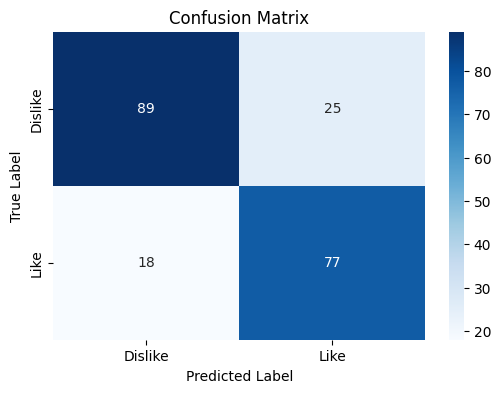

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       114
         1.0       0.81      0.82      0.82        95

    accuracy                           0.83       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.83      0.83      0.83       209



In [ ]:
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(preprocessed_data[:, :-1], preprocessed_data[:, -1], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

y_pred = (model.predict(X_test) > 0.5).astype("int32")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dislike', 'Like'], yticklabels=['Dislike', 'Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)